## Multi Task Learning with NLP (Project)
Detech Emotions ,Violence ,Hate from text

# Emotions
0: Sadness
1: Joy
2: Love
3: Anger
4: Fear
5: Surprise

# Violence
0: Harmful,Traditional_practice
1: Physical_violence
2: economic_violence
3: emotional_violence
4: sexual_violence

# Hate
0: Hate Speech
1: Offensive Speech
2: Neither

# 1. Loading the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
emotion_df=pd.read_csv("/content/sample_data/Multi Task Learning with NLP (Project)/Emotions.csv")

In [4]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [12]:
violence_df=pd.read_csv("/content/sample_data/Multi Task Learning with NLP (Project)/Violence.csv")

In [13]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [14]:
hate_df=pd.read_csv("/content/sample_data/Multi Task Learning with NLP (Project)/HateSpeech .csv")

In [15]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# 2. Data Preprocessing

In [16]:
#dropping unwanted columns
emotion_df.drop(columns =['Unnamed: 0'],inplace=True)
violence_df.drop(columns =['Tweet_ID'] ,inplace=True)
hate_df=hate_df[['tweet','class']]

In [17]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [18]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [19]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [20]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [21]:
# renaming the columns
violence_df = violence_df.rename(columns={'tweet': 'text', 'type': 'label'})
hate_df     = hate_df.rename(columns={'tweet': 'text', 'class': 'label'})

In [22]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [23]:
# checking for null values
emotion_df.isna().sum(),violence_df.isna().sum(),hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [24]:
emotion_df.shape,violence_df.shape,hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [25]:
emotion_df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [26]:
e_df = pd.DataFrame()
for i in range(6):
    subset =emotion_df[emotion_df['label']==i].sample(n= 2000,random_state=42)
    e_df = pd.concat([e_df,subset])

In [27]:
e_df.shape

(12000, 2)

In [28]:
emotion_df = e_df.copy()

In [29]:
emotion_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [30]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [31]:
# we just want 4998 rows from the sexual_voilence label
sexual_violence = violence_df[violence_df['label']=='sexual_violence'].sample(n=4998,random_state=42)
violence_df = violence_df[violence_df['label']!='sexual_violence']

In [32]:
violence_df.shape

(7002, 2)

In [33]:
violence_df=pd.concat([sexual_violence,violence_df],axis=0)

In [34]:
violence_df.shape

(12000, 2)

In [35]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [36]:
offensive_sppech=hate_df[hate_df['label']==1].sample(n=6407,random_state=42)
hate_df=hate_df[hate_df['label']!=1]

In [37]:
hate_df.shape

(5593, 2)

In [38]:
hate_df=pd.concat([offensive_sppech,hate_df],axis=0)

In [39]:
hate_df.shape

(12000, 2)

In [40]:
emotion_df.shape,violence_df.shape,hate_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [41]:
emotion_df.head(3)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0


In [42]:
violence_df.head(3)

,text,label
35209,My cousin was raped by this guy Matthew. She w...,sexual_violence
38191,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
20925,I remember how I almost got raped like it was ...,sexual_violence


In [43]:
hate_df.head(3)

,text,label
22889,Why is it everytime I go to cracker barrel the...,1
20565,"Run that nigga, you don't want that nigga, but...",1
10780,I need a girl from Jamaica I can't fuck with t...,1


In [44]:
# resetting the indexes
emotion_df.reset_index(drop = True,inplace=True)
violence_df.reset_index(drop = True,inplace=True)
hate_df.reset_index(drop = True,inplace=True)

In [45]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


In [46]:
violence_df.head(3)

,text,label
0,My cousin was raped by this guy Matthew. She w...,sexual_violence
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
2,I remember how I almost got raped like it was ...,sexual_violence


In [47]:
hate_df.head(3)

,text,label
0,Why is it everytime I go to cracker barrel the...,1
1,"Run that nigga, you don't want that nigga, but...",1
2,I need a girl from Jamaica I can't fuck with t...,1


# 3.Label encoding

In [48]:
label_encoder=LabelEncoder()
violence_df['label']=label_encoder.fit_transform(violence_df['label'])

In [49]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [50]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

# 4. Stopwords Removal

In [58]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')   # 🔴 IMPORTANT (new)
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
#stopwords removal function
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    words = nltk.word_tokenize(text)
    filtered_words = [
        w for w in words
        if w.lower() not in stop_words and w not in string.punctuation
    ]
    return ' '.join(filtered_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)


In [61]:
emotion_df.head(3)

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0


# 5. Tokenization & Padding

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'],violence_df['text'],hate_df['text']]))

In [63]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [64]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [65]:
emotion_sequences[2:3]

[[1, 5, 320, 11850, 1206, 420, 1092, 384]]

In [66]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences,maxlen=max_length,padding='post')
violence_padded = pad_sequences(violence_sequences,maxlen=max_length,padding='post')
hate_padded = pad_sequences(hate_sequences,maxlen=max_length,padding='post')

In [67]:
emotion_padded[2:3]

array([[    1,     5,   320, 11850,  1206,   420,  1092,   384,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [68]:
# generating labels in numpy array format
emotion_label = np.array(emotion_df['label'])
violence_label = np.array(violence_df['label'])
hate_label = np.array(hate_df['label'])


# 6.Model defination

In [69]:
# prepare seperate inputs for each dataset
emotion_input=emotion_padded
violence_input=violence_padded
hate_input=hate_padded

In [70]:
# defining multiple inputs laues for each tasks
emotion_input_layer = keras.layers.Input(shape=(max_length,),name='emotion_input')
violence_input_layer = keras.layers.Input(shape=(max_length,),name='violence_input')
hate_input_layer = keras.layers.Input(shape=(max_length,),name='hate_input')

In [71]:
#use as shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128)

In [72]:
#apply the embedding layer to each input
emotion_embedding=embedding_layer(emotion_input_layer)
violence_embedding=embedding_layer(violence_input_layer)
hate_embedding=embedding_layer(hate_input_layer)

In [73]:
#shared LSTM layer
shared_lstm=keras.layers.LSTM(64,return_sequences=True)

In [74]:
emotion_lstm=shared_lstm(emotion_embedding)
violence_lstm=shared_lstm(violence_embedding)
hate_lstm=shared_lstm(hate_embedding)

In [75]:
#shared global average pooling layer and dropout layer
shared_pooling=keras.layers.GlobalAveragePooling1D()
shared_dropout=keras.layers.Dropout(0.5)

In [76]:
emotion_features=shared_dropout(shared_pooling(emotion_lstm))
violence_features=shared_dropout(shared_pooling(violence_lstm))
hate_features=shared_dropout(shared_pooling(hate_lstm))

In [77]:
len(emotion_df['label'].unique()),len(violence_df['label'].unique()),len(hate_df['label'].unique())

(6, 5, 3)

In [78]:
#output layers
emotion_output = keras.layers.Dense(6,activation='softmax', name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5,activation='softmax', name='violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation='softmax', name='hate_output')(hate_features)

In [79]:
# compile the model with multiple inputs and outputs
model = keras.models.Model(inputs=[emotion_input_layer,violence_input_layer,hate_input_layer],
                           outputs=[emotion_output,violence_output,hate_output])
model.compile(optimizer='adam',
              loss={
                  'emotion_output':'sparse_categorical_crossentropy',
                  'violence_output':'sparse_categorical_crossentropy',
                  'hate_output':'sparse_categorical_crossentropy'
              },
              metrics={
                  'emotion_output':'accuracy',
                  'violence_output':'accuracy',
                  'hate_output':'accuracy'
              })


In [80]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,349,376 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,399,694 (20.60 MB)

 Trainable params: 5,399,694 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
#training the model with seperate inputs
model.fit(x= {'emotion_input':emotion_input,
           'violence_input':violence_input,
           'hate_input':hate_input},
          y ={'emotion_output':emotion_label,
              'violence_output':violence_label,
              'hate_output':hate_label},
          epochs = 10,
          batch_size=4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 244s 81ms/step - emotion_output_accuracy: 0.9885 - emotion_output_loss: 0.0316 - hate_output_accuracy: 0.9981 - hate_output_loss: 0.0053 - loss: 0.0383 - violence_output_accuracy: 0.9997 - violence_output_loss: 0.0014
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 250s 77ms/step - emotion_output_accuracy: 0.9926 - emotion_output_loss: 0.0196 - hate_output_accuracy: 0.9970 - hate_output_loss: 0.0100 - loss: 0.0365 - violence_output_accuracy: 0.9990 - violence_output_loss: 0.0069
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 272s 81ms/step - emotion_output_accuracy: 0.9911 - emotion_output_loss: 0.0229 - hate_output_accuracy: 0.9977 - hate_output_loss: 0.0062 - loss: 0.0320 - violence_output_accuracy: 0.9990 - violence_output_loss: 0.0028
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 253s 78ms/step - emotion_output_accuracy: 0.9932 - emotion_output_loss: 0.0184 - hate_output_accuracy: 0.9980 - hate_output_loss: 0.0090 - loss: 0.0312 - violence_output_accuracy

# 7. Prediction & Evaluation

In [83]:
prediction=model.predict({'emotion_input':emotion_input,
                          'violence_input':violence_input,
                          'hate_input':hate_input})


375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


In [84]:
prediction

[array([[9.9999744e-01, 1.8429998e-07, 6.2532919e-08, 1.7289034e-06,
         3.1480420e-07, 5.5832203e-08],
        [9.9999386e-01, 2.6668468e-07, 3.6410472e-09, 5.8636460e-06,
         2.9806785e-08, 2.4432730e-08],
        [9.9999696e-01, 2.8452030e-07, 6.3032594e-08, 2.3151165e-06,
         3.0391766e-07, 2.6352938e-08],
        ...,
        [8.1783392e-06, 4.6943246e-06, 4.1983976e-06, 1.0726598e-05,
         1.8366892e-04, 9.9978852e-01],
        [1.9502780e-08, 1.4473787e-08, 1.9476043e-09, 3.4755245e-09,
         2.6536594e-07, 9.9999958e-01],
        [2.1229641e-07, 1.2772185e-06, 1.8600423e-06, 6.8576412e-07,
         7.6598408e-06, 9.9998826e-01]], dtype=float32),
 array([[7.46819329e-10, 1.65279734e-09, 1.14413826e-10, 4.50427518e-09,
         9.99999940e-01],
        [1.97521000e-09, 2.54218646e-09, 5.14696306e-11, 1.04426139e-08,
         9.99999940e-01],
        [5.23552217e-07, 1.20745071e-07, 2.62043859e-10, 1.00824207e-06,
         9.99998271e-01],
        ...,
      

In [85]:
emotion_pred=np.argmax(prediction[0],axis=1)
violence_pred=np.argmax(prediction[1],axis=1)
hate_pred=np.argmax(prediction[2],axis=1)

In [86]:
def plot_cm(true,pred,title,labels):
    cf=confusion_matrix(true,pred,normalize='true')
    plt.figure(figsize=(7,6))
    sns.heatmap(cf,annot=True,cmap='Blues',xticklabels=labels,yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

emotion_labels_text=['sadness','jou','love','anger','fear','surprise']
violence_labels_text=['sexual_violence','physical_violence','emotional_violence','Harmful_traditional_practice','economic_violence']
hate_labels_text=['offensive_sppech','Neither','Hate_Speech']

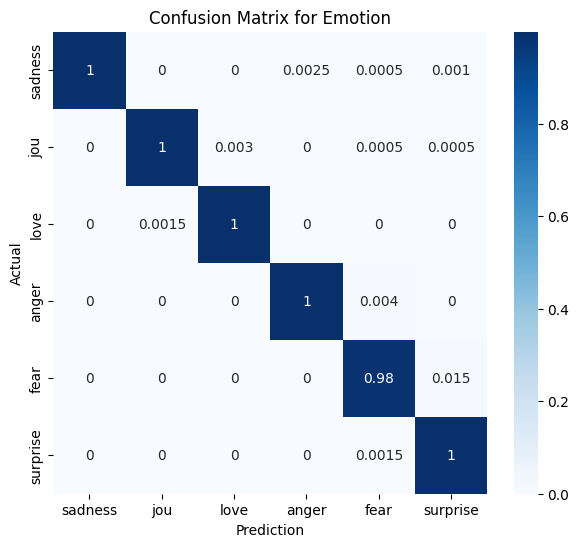

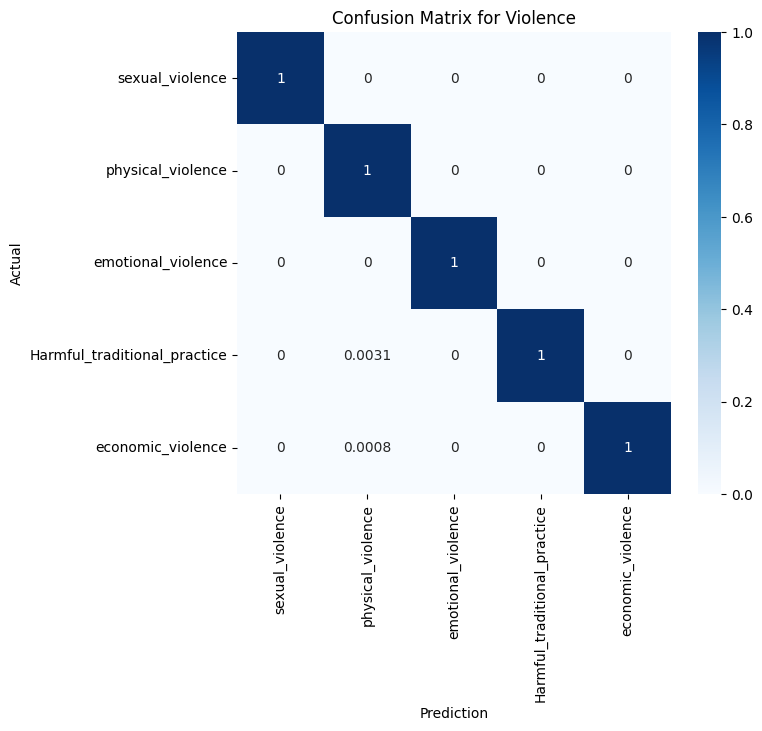

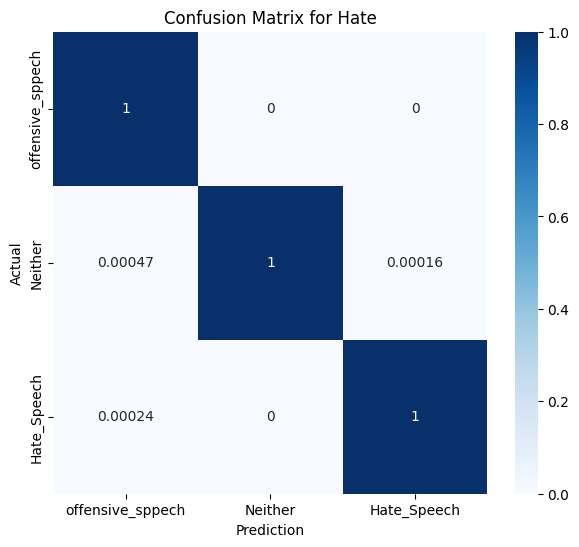

In [87]:
plot_cm(emotion_label,emotion_pred,'Confusion Matrix for Emotion',emotion_labels_text)
plot_cm(violence_label,violence_pred,'Confusion Matrix for Violence',violence_labels_text)
plot_cm(hate_label,hate_pred,'Confusion Matrix for Hate',hate_labels_text)


# 8.Manual Testing

In [119]:
label_encoder.classes_


array(['Harmful_Traditional_practice', 'Physical_violence',
       'economic_violence', 'emotional_violence', 'sexual_violence'],
      dtype=object)

In [120]:
def classify_text(input_text):

    # ---- Preprocess ----
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(
        input_sequence, maxlen=max_length, padding='post'
    )

    # ---- Predictions ----
    emotion_pred, violence_pred, hate_pred = model.predict({
        'emotion_input': input_padded,
        'violence_input': input_padded,
        'hate_input': input_padded
    })

    emotion_idx = np.argmax(emotion_pred, axis=1)[0]
    violence_idx = np.argmax(violence_pred, axis=1)[0]
    hate_idx = np.argmax(hate_pred, axis=1)[0]

    # ---- LABELS (EXACT TRAINING ORDER) ----
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

    violence_labels_text = [
        'Harmful_Traditional_practice',
        'Physical_violence',
        'economic_violence',
        'emotional_violence',
        'sexual_violence'
    ]

    hate_labels_text = ['offensive_speech', 'Neither', 'Hate_Speech']

    # ---- MAJOR TASK LOGIC (FIXED) ----
    # Rule-based routing (recommended)
    if emotion_idx is not None:
        major_label = 'Emotion'
        sub_label = emotion_labels_text[emotion_idx]

    return major_label, sub_label


In [127]:
def preprocess_emotion(text):
    seq = tokenizer.texts_to_sequences([text.lower()])
    return pad_sequences(seq, maxlen=max_length, padding='post')

def preprocess_other(text):
    text = remove_stopwords(text)
    seq = tokenizer.texts_to_sequences([text])
    return pad_sequences(seq, maxlen=max_length, padding='post')


In [128]:
import ipywidgets as widgets
from IPython.display import display

In [129]:
#define a text widget and a placeholder
input_text_widget=widgets.Text(
    description='Input text :',
    placeholder='Enter your text'
)

In [130]:
#define classify button
button=widgets.Button(description='classify')

In [131]:
#define output area to display result
output=widgets.Output()

In [132]:
#function to handle event
def on_button_click(b):
    with output:
        output.clear_output() #clear the previous output
        input_text=input_text_widget.value
        major_label,sub_label=classify_text(input_text)
        print(f"Major Label :{major_label}")
        print(f"Sub Label :{sub_label}")

#attach the button at bottom
button.on_click(on_button_click)

In [133]:
display(input_text_widget,button, output)

Text(value='', description='Input text :', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()